# Overview analysis from Madrid

In [20]:
import json
import pandas as pd
import os

#Open the madrid coworkings csv
path = '/workspaces/Coworking/src/results/Madrid_coworking_spaces.json'

with open(path, 'r', encoding='utf-8') as file:
    data = json.load(file)

df = pd.json_normalize(data)

df_overview = df[['description']]

In [21]:
df_overview.head()

,description
0,Overview of WeWork Eloy Gonzalo 27\n***OPENING...
1,"Overview of Regus - Madrid, La Moraleja\nA mod..."
2,Overview of Regus - Madrid Pinar-Salamanca Dis...
3,"Overview of Regus - Madrid, Torre de Cristal\n..."
4,"Overview of Regus - Madrid, Avenida America\nM..."


            word  frequency
11256      space        277
2906   coworking        228
8735    overview        185
1333    business        185
7099      madrid        171
8423     offices        156
7472     meeting        151
13269       work        141
8349      office        134
10445      rooms        131


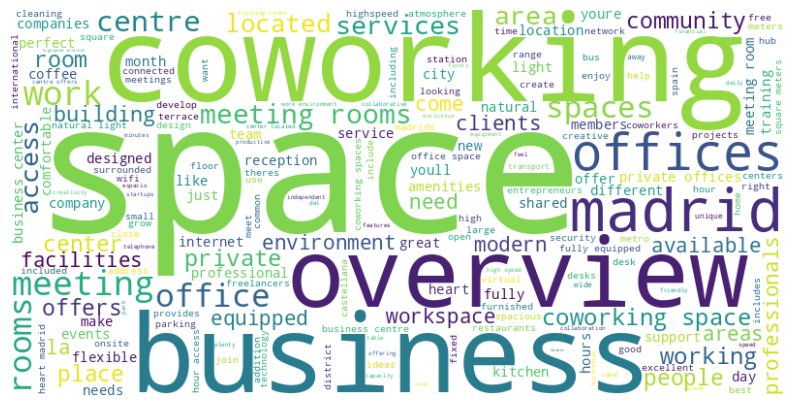

In [22]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json

# Preprocessing the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits (leave only alphabets and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    
    return text

# Load your JSON data
with open(path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Normalize the JSON to a DataFrame
df = pd.json_normalize(data)

# Apply preprocessing to each row in the 'overview' column
df['overview_cleaned'] = df['description'].apply(lambda x: preprocess_text(x))

# Step 2: Common Words Analysis
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))  # (1, 2) for unigrams and bigrams
X = vectorizer.fit_transform(df['overview_cleaned'])

# Get the most common words/bigrams
word_freq = X.toarray().sum(axis=0)
common_words = vectorizer.get_feature_names_out()

# Create a DataFrame to display the common words and their frequencies
word_freq_df = pd.DataFrame(zip(common_words, word_freq), columns=['word', 'frequency'])
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

# Print the top 10 most common words/bigrams
print(word_freq_df.head(10))

# Step 3: Visualize the Common Words (Word Cloud)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(common_words, word_freq)))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
word_freq_df.drop(columns='ovierview', )